In [1]:
import numpy as np
import pylab as py

N = 8192
b = 2
a = 0
h = (b - a) / N
f = np.sin

def midpoint(f, a, b, N):
    mysum = 0
    n = 0
    while n < N:
        xn = a + (n + 1 / 2) * h
        mysum += pow(f(np.sqrt(100 * xn)), 2) * h
        n += 1
    return mysum

def leftpoint(f, a, b, N):
    mysum = 0
    n = 0
    while n < N:
        xn = a + n * h
        mysum += pow(f(np.sqrt(100 * xn)), 2) * h
        n += 1
    return mysum

def rightpoint(f, a, b, N):
    mysum = 0
    n = 0
    while n < N:
        xn = a + (n + 1) * h
        mysum += pow(f(np.sqrt(100 * xn)), 2) * h
        n += 1
    return mysum

def trap(f, a, b, N):
    return 1 / 2 * (leftpoint(f, a, b, N) + rightpoint(f, a, b, N))

def simp(f, a, b, N):
    return 1 / 3 * trap(f, a, b, N) + 2 / 3 * midpoint(f, a, b, N)

"""
while N < 10000:
    h = (b - a) / N
    if trap(f, a, b, N) >= 1.005702:
        print(trap(f, a, b, N), N)
        break
    N *= 2
"""

print(trap(f, a, b, N))

1.0057020459471633


The N required for this to be accurate to the e-6 is N = 8192

In [132]:
fb = (5 / np.sqrt(b)) * 2 * np.sin(np.sqrt(100 * b)) * np.cos(np.sqrt(100 * b))
fa = (5 / np.sqrt(a + pow(1, -20))) * 2 * np.sin(np.sqrt(100 * (a + pow(1, -20)))) * np.cos(np.sqrt(100 * (a + pow(1, -20)))) #Approximately a
#fa = (5 / np.sqrt(a)) * 2 * np.sin(np.sqrt(100 * a)) * np.cos(np.sqrt(100 * a))
err = -(pow(b - a, 2) / (12 * pow(N, 2))) * (fb - fa)
print(err)

2.2847749624775244e-08


Obviously when x = a and x = b are plugged into the expression for u, the values returned are -1 and 1 respectively, 
as they should be; since x lies between a and b before the u sub, it makes sense that u will lie between -1 
and 1. And doing a simple derivative results in du = 2 / (b - a) * dx. Some finagling of the original integral 
gives f(u) = sin^2(sqrt(100(u+1))) for the integral from -1 to 1.

In [6]:
%reset -f
import numpy as np
import pylab as py

N = 256
b = 1
a = -1
h = (b - a) / N #now serves as du, since it just so happens to be the same number (definitely just a coincidence)
f = np.sin

def midpoint(f, a, b, N):
    mysum = 0
    n = 0
    while n < N:
        xn = a + (n + 1 / 2) * h
        un = (2 * xn - b - a) / (b - a)
        mysum += pow(f(np.sqrt(100 * (un + 1))), 2) * h
        n += 1
    return mysum

def leftpoint(f, a, b, N):
    mysum = 0
    n = 0
    while n < N:
        xn = a + n * h
        un = (2 * xn - b - a) / (b - a)
        mysum += pow(f(np.sqrt(100 * (un + 1))), 2) * h
        n += 1
    return mysum

def rightpoint(f, a, b, N):
    mysum = 0
    n = 0
    while n < N:
        xn = a + (n + 1) * h
        un = (2 * xn - b - a) / (b - a)
        mysum += pow(f(np.sqrt(100 * (un + 1))), 2) * h
        n += 1
    return mysum

def trap(f, a, b, N):
    return 1 / 2 * (leftpoint(f, a, b, N) + rightpoint(f, a, b, N))

def simp(f, a, b, N):
    return 1 / 3 * trap(f, a, b, N) + 2 / 3 * midpoint(f, a, b, N)

print(simp(f, a, b, N))

1.0057021983156127


I will now write the code block allowing for the creation of the 4x4 table of graphs of Legendre Polynomials.
Note that the row Legendre Polynomial is in red, the column Legendre Polynomial is blue, and the product
of the two is green, meaning the diagonal entries have a red and blue line that overlap.
It is also important to note that the diagonal entries do visually appear to integrate out to zero, but some
investigation of the other spots on the table shows that the non-diagonal product functions do not seem
to integrate to 1, but I believe this is simply due to some mathematician's dumb renormalization of the
Legendre Polynomials that I found on Wikipedia.

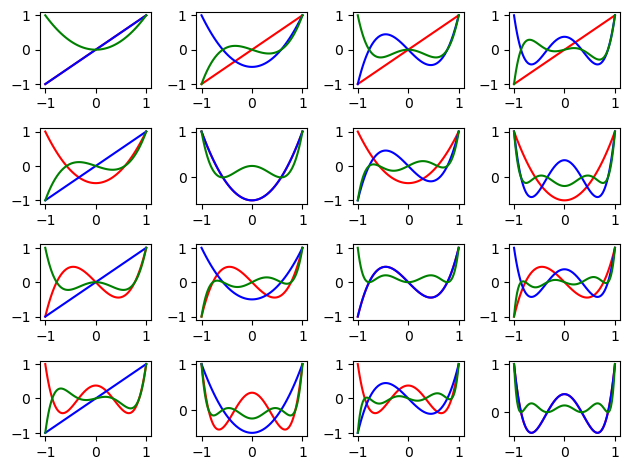

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1, 1, 100)
P1 = x
P2 = (1 / 2) * (3 * pow(x, 2) - 1)
P3 = (1 / 2) * (5 * pow(x, 3) - 3 * x)
P4 = (1 / 8) * (35 * pow(x, 4) - 30 * pow(x, 2) + 3)

fig, plot = plt.subplots(4, 4)
plot[0, 0].plot(x, P1, 'r')
plot[0, 0].plot(x, P1, 'b')
plot[0, 0].plot(x, P1 * P1, 'g')
plot[0, 1].plot(x, P1, 'r')
plot[0, 1].plot(x, P2, 'b')
plot[0, 1].plot(x, P1 * P2, 'g')
plot[0, 2].plot(x, P1, 'r')
plot[0, 2].plot(x, P3, 'b')
plot[0, 2].plot(x, P1 * P3, 'g')
plot[0, 3].plot(x, P1, 'r')
plot[0, 3].plot(x, P4, 'b')
plot[0, 3].plot(x, P1 * P4, 'g')
plot[1, 0].plot(x, P2, 'r')
plot[1, 0].plot(x, P1, 'b')
plot[1, 0].plot(x, P2 * P1, 'g')
plot[1, 1].plot(x, P2, 'r')
plot[1, 1].plot(x, P2, 'b')
plot[1, 1].plot(x, P2 * P2, 'g')
plot[1, 2].plot(x, P2, 'r')
plot[1, 2].plot(x, P3, 'b')
plot[1, 2].plot(x, P2 * P3, 'g')
plot[1, 3].plot(x, P2, 'r')
plot[1, 3].plot(x, P4, 'b')
plot[1, 3].plot(x, P2 * P4, 'g')
plot[2, 0].plot(x, P3, 'r')
plot[2, 0].plot(x, P1, 'b')
plot[2, 0].plot(x, P3 * P1, 'g')
plot[2, 1].plot(x, P3, 'r')
plot[2, 1].plot(x, P2, 'b')
plot[2, 1].plot(x, P3 * P2, 'g')
plot[2, 2].plot(x, P3, 'r')
plot[2, 2].plot(x, P3, 'b')
plot[2, 2].plot(x, P3 * P3, 'g')
plot[2, 3].plot(x, P3, 'r')
plot[2, 3].plot(x, P4, 'b')
plot[2, 3].plot(x, P3 * P4, 'g')
plot[3, 0].plot(x, P4, 'r')
plot[3, 0].plot(x, P1, 'b')
plot[3, 0].plot(x, P4 * P1, 'g')
plot[3, 1].plot(x, P4, 'r')
plot[3, 1].plot(x, P2, 'b')
plot[3, 1].plot(x, P4 * P2, 'g')
plot[3, 2].plot(x, P4, 'r')
plot[3, 2].plot(x, P3, 'b')
plot[3, 2].plot(x, P4 * P3, 'g')
plot[3, 3].plot(x, P4, 'r')
plot[3, 3].plot(x, P4, 'b')
plot[3, 3].plot(x, P4 * P4, 'g')

'''
plot[0, 0].set_title('P1, P1, P1 * P1')
plot[0, 1].set_title('P1, P2, P1 * P2')
plot[0, 2].set_title('P1, P3, P1 * P3')
plot[0, 3].set_title('P1, P4, P1 * P4')
plot[1, 0].set_title('P2, P1, P2 * P1')
plot[1, 1].set_title('P2, P2, P2 * P2')
plot[1, 2].set_title('P2, P3, P2 * P3')
plot[1, 3].set_title('P2, P4, P2 * P4')
plot[2, 0].set_title('P3, P1, P3 * P1')
plot[2, 1].set_title('P3, P2, P3 * P2')
plot[2, 2].set_title('P3, P3, P3 * P3')
plot[2, 3].set_title('P3, P4, P3 * P4')
plot[3, 0].set_title('P4, P1, P4 * P1')
plot[3, 1].set_title('P4, P2, P4 * P2')
plot[3, 2].set_title('P4, P3, P4 * P3')
plot[3, 3].set_title('P4, P4, P4 * P4')
'''

#for i in plot.flat:
#    i.set(xlabel='x', ylabel='y')

fig.tight_layout()
plt.savefig("4x4Grid.png")

Now using the Legendre Polynomials and their roots and weightings, I will write the code for the gaussian quadrature
approximation

In [129]:
%reset -f
import numpy as np
import scipy as sp

N = 12

def Legendre(N):
    mysum = 0
    roots, weights = sp.special.roots_legendre(N)
    i = 0 
    while i < N:
        mysum += weights[i] * pow(np.sin(np.sqrt(100 * (roots[i] + 1))), 2)
        i += 1
    return mysum

mysum = Legendre(N)
print(f"For N = {N}, the integral is {mysum}")


For N = 12, the integral is 1.0057025716787658


This doesn't do well for very small N, but with N as low as 12 the value for the integral is precise to 7 digits, which is
pretty dang good.

Now starting the first extension, where the integral needs to be precise to 10 sig figs, with it equal to
6.03397786612. Note that since the x distance covered by the integral is the same before and after the
u-sub, so it is the same as simply shifting the line back by 1 in the -x direction, as I have done.

In [4]:
%reset -f
import numpy as np
import scipy as sp

N = 100000
true = 6.03397786612

def Legendre(N):
    mysum = 0
    roots, weights = sp.special.roots_legendre(N)
    i = 0 
    while i < N:
        mysum += weights[i] * (pow(roots[i] + 1, 2) / np.sqrt(1 - roots[i]))
        i += 1
    return mysum

mysum = Legendre(N)
print(f"For N = {N}, the integral is {mysum}")

5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
For N = 100000, the integral is 6.033925823399683


My answer for this what number of points makes this have 10 sig fig precision is too dang many. I will move on to
using the simpson's rule after the variable change. 
The function being integrated becomes 2^(7/2) * sin^5(Theta), and it is integrated from 0 to PI / 2.

In [19]:
%reset -f
import numpy as np
import pylab as py

N = 51
b = np.pi / 2
a = 0
h = (b - a) / N
f = np.sin

def midpoint(f, a, b, N):
    mysum = 0
    n = 0
    while n < N:
        Thetn = a + (n + 1 / 2) * h
        mysum += pow(2, 7 / 2) * pow(f(Thetn), 5) * h
        n += 1
    return mysum

def leftpoint(f, a, b, N):
    mysum = 0
    n = 0
    while n < N:
        Thetn = a + n * h
        mysum += pow(2, 7 / 2) * pow(f(Thetn), 5) * h
        n += 1
    return mysum

def rightpoint(f, a, b, N):
    mysum = 0
    n = 0
    while n < N:
        Thetn = a + (n + 1) * h
        mysum += pow(2, 7 / 2) * pow(f(Thetn), 5) * h
        n += 1
    return mysum

def trap(f, a, b, N):
    return 1 / 2 * (leftpoint(f, a, b, N) + rightpoint(f, a, b, N))

def simp(f, a, b, N):
    return 1 / 3 * trap(f, a, b, N) + 2 / 3 * midpoint(f, a, b, N)

mysum = simp(f, a, b, N)
while mysum >= 6.03397786613:
    N += 1
    h = (b - a) / N
    mysum = simp(f, a, b, N) 
    print(mysum)

print(f"For N = {N}, the integral is {mysum}")

6.033977866135873
6.033977866134722
6.0339778661337125
6.0339778661328225
6.033977866132044
6.033977866131354
6.033977866130744
6.033977866130204
6.0339778661297245
For N = 60, the integral is 6.0339778661297245


A measly 60 points are required to make the integral work with simpson's rule after the Theta-sub.
Now I will do gausian quadrature with this; I used the u-sub from earlier and got that the function
becomes PI * 2^(3/2) * sin^5(PI/4 * (u + 1)). It is used below.

In [28]:
%reset -f
import numpy as np
import scipy as sp

N = 10
true = 6.03397786612
f = np.sin

def Legendre(N):
    mysum = 0
    roots, weights = sp.special.roots_legendre(N)
    i = 0 
    while i < N:
        mysum += weights[i] * (np.pi * pow(2, 3 / 2) * pow(f(np.pi / 4 * (roots[i] + 1)), 5))
        i += 1
    return mysum

mysum = Legendre(N)
print(f"For N = {N}, the integral is {mysum}")

For N = 10, the integral is 6.033977866125503


Here, only 10 points are needed to make the integral accurate to 10 sig figs, which is absolutely absurd.
The gods surely smile upon us with calculations this quick.